  # THE SPARKS FOUNDATION

# TASK - 1

# Name : Priyanshu Gupta

##     Task : Data Science & Business Analytics -Supervised Machine Learning

## Problem Statement:

1) Predict the percentage of an student based on the no. of study hours using supervised ML.

2) Predict what will be score if a student studies for 9.25 hrs/ day.

In [24]:
# Importing all libraries required in this notebook

import pandas as pd
import numpy as np  
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  
%matplotlib inline

In [25]:
# Reading data from remote link

data = pd.read_csv("http://bit.ly/w-data")
print("Dataset successfully imported!")

Dataset successfully imported!


In [26]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [27]:
# head of the dataset
data.head()  

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [28]:
# tail of the dataset
data.tail()  

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [29]:
data.shape  

(25, 2)

Dataset has 25 rows and 2 columns

In [30]:
data.describe()      

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [32]:
# Checks and tell if dataset has a null value it will return True otherwise False. 

data.isnull()     

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [33]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

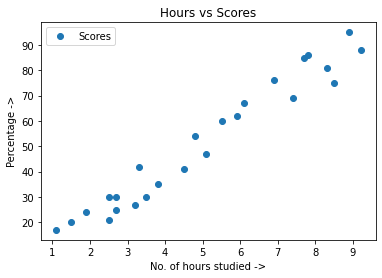

In [34]:
# Scatter plot

data.plot(x='Hours', y='Scores', style = 'o')
plt.title("Hours vs Scores")
plt.xlabel("No. of hours studied ->")
plt.ylabel("Percentage ->")
plt.show()

## From the above graph, we can infer that there is a positive linear relation between the number of hours studied and percentage of score.

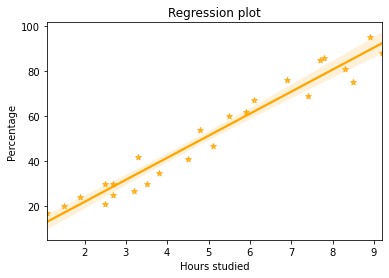

In [35]:
# Regression plot

sns.regplot(x = data['Hours'], y = data['Scores'], marker= '*', color= 'orange')
plt.title('Regression plot')
plt.xlabel('Hours studied')
plt.ylabel('Percentage')
plt.show()

<AxesSubplot:>

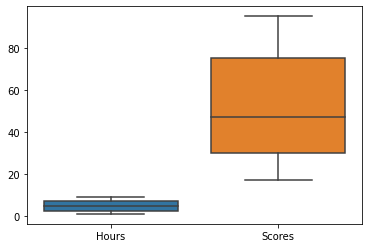

In [36]:
# Boxplot

sns.boxplot(data= data)

From the above, plot we can see there are not outiler in dataset.

# Splitting the dataset

In [37]:
# Data pre-processing to fetch input / independent variable & dependent attribute

x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [38]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [39]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [40]:
# Training and test splitting

X_train , X_test , Y_train, Y_test = train_test_split(x , y , test_size=0.2, random_state = 0)

# Implementing Linear Regression Algorithm

In [41]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train , Y_train)     # Complete training

LinearRegression()

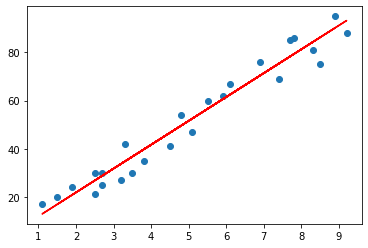

In [42]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# plotting for the test data
plt.scatter(x, y)
plt.plot(x, line, color ='red')
plt.show()

In [43]:
# Testing our Algorithm

print(X_test)  # Testing data - In Hours
y_pred = regressor.predict(X_test)    # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [44]:
# Creating a data frame of actual and predicted values

data_frame = pd.DataFrame({'Actual' : Y_test, 'Predicted' : y_pred})
data_frame

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [45]:
# Checking the percentage on the given data point(studey hours = 9.25)

hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours ={}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours =[[9.25]]
Predicted Score = 93.69173248737538


In [46]:
# Checking the performance of algorithm

from sklearn import metrics
print("Mean Absolute error is : " , metrics.mean_absolute_error(Y_test, y_pred))

Mean Absolute error is :  4.183859899002975


# Conclusion : Hence, we concluded that if a study studies for 9.25 per day, then their is a possibilty of perentage comes out to be  93.6917%